In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [4]:
data_dir='/content/drive/MyDrive/PlantDisease/Data'
categories=os.listdir(data_dir)

images=[]
labels=[]

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)
      img=cv2.imread(img_path)
      if img is not None:
        img = cv2.resize(img, (64, 64))
        images.append(img)
        labels.append(category)

images=np.array(images)


Tomato___Early_blight
Tomato___Bacterial_spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___healthy


In [5]:
x=np.array(images)
y=np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)

Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (11842, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1973
Tomato___healthy                          1926
Tomato___Early_blight                     1920
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1837
Tomato___Tomato_mosaic_virus              1790
Tomato___Bacterial_spot                    545
Name: count, dtype: int64


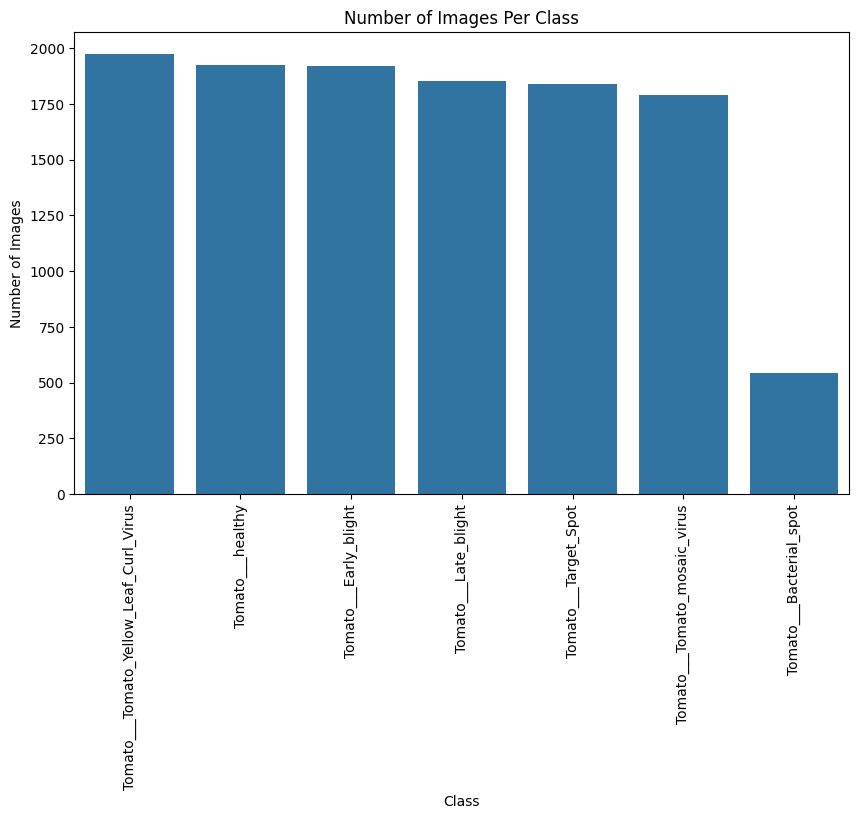

In [6]:
class_counts=pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)

# plot class distribution

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images Per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [7]:
valid_images=[]
valid_labels=[]

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)

print("Cleared Data Shape:",x.shape)

Cleared Data Shape: (11842, 64, 64, 3)


In [8]:
#Encode Labels

le=LabelEncoder()
y_encoded=le.fit_transform(y)


# save class names for later use

class_names=le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

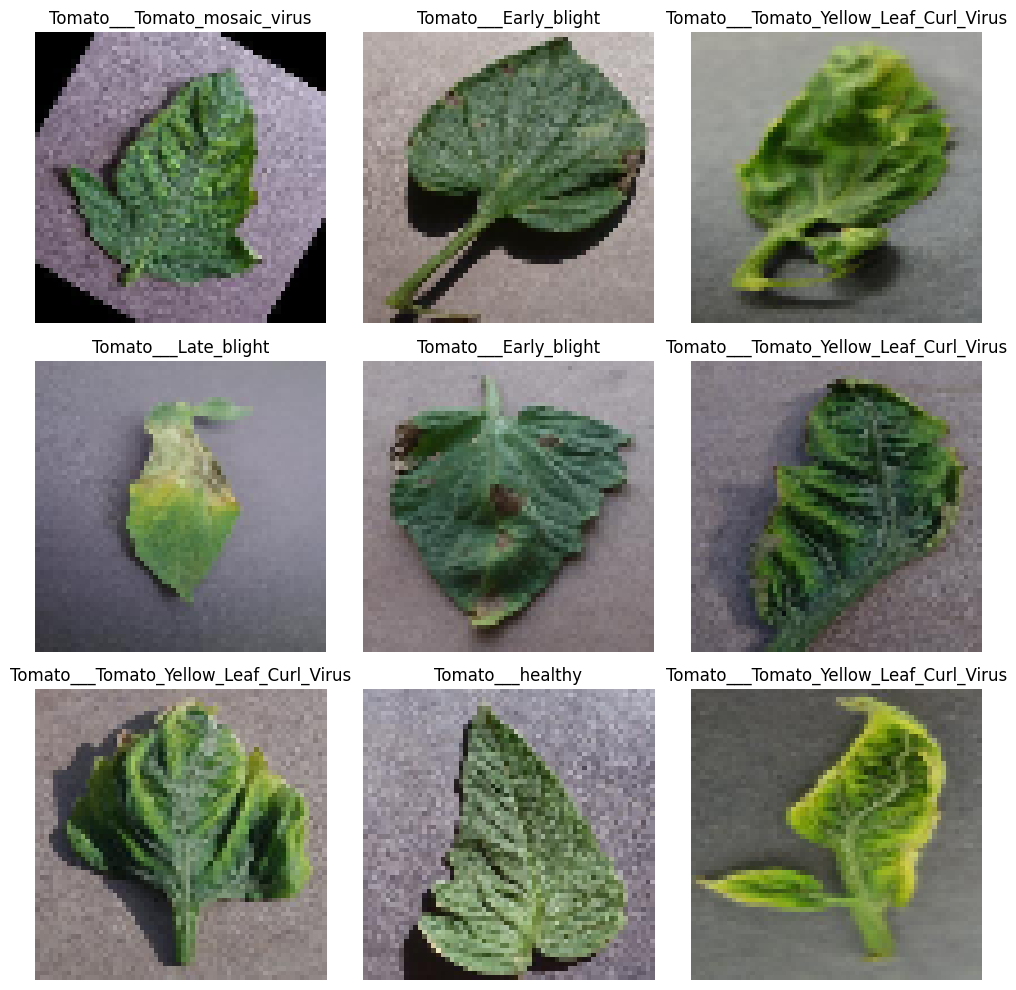

In [9]:
import random
plt.figure(figsize=(10,10))
for i in range(9):
  idx=random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
def extract_color_histogram(image, bins=(8,8,8)):

  images = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([images], [0,1,2], None, bins, [0,256,0,256,0,256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [11]:
x_features.shape

(11842, 512)

In [12]:
model = SVC(kernel='rbf', C=10, gamma='scale')

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded,test_size=0.2,random_state=42)

model.fit(x_train, y_train)

y_pred=model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix,classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9780498100464331


Accuracy: 0.9780498100464331
F1 Score: 0.9779119402555492


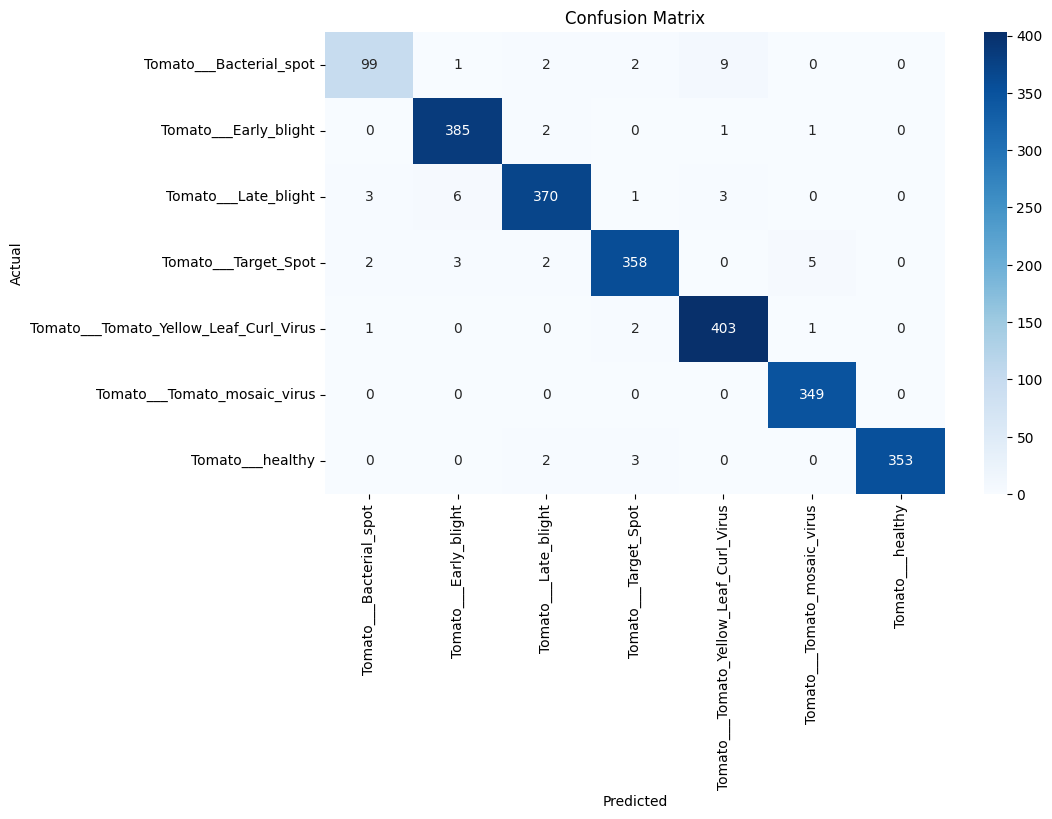

In [17]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#f1_score
f1= f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#plot confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.94      0.88      0.91       113
                 Tomato___Early_blight       0.97      0.99      0.98       389
                  Tomato___Late_blight       0.98      0.97      0.97       383
                  Tomato___Target_Spot       0.98      0.97      0.97       370
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.99      0.98       407
          Tomato___Tomato_mosaic_virus       0.98      1.00      0.99       349
                      Tomato___healthy       1.00      0.99      0.99       358

                              accuracy                           0.98      2369
                             macro avg       0.97      0.97      0.97      2369
                          weighted avg       0.98      0.98      0.98      2369

